# Finding the Best Markets to Advertise in:
# E-Learning Products
## Introduction
In this project, we'll explore some very basic statistical uses in data science and how they can be used to better understand our data. We'll use the following assumption to put ourselves in the shoes of an actual analyst: 

    "Assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in."

Let's get started!

## Exploring the Data
We could start by organizing surveys ourselves to see what the people think, but why waste money when information is already available? We can try to go the cheap route first.

A good place to start is using freeCodeCamp's 2017 New Coder Survey. This was a publicly available survey that may be of use to us. FreeCodeCamp is a free e-learning platform like us, and offers courses to a wide range of followers (over half a million), so their focus isn't really just solely on web development, which is good for us. In fact, it looks ideal. We can use the results of their survey to see where people responded positively to the most.

In [1]:
# read in the data
import pandas as pd
# let's use a new way to read in a csv using a link:
link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
fcc = pd.read_csv(link, low_memory = 0)  # low_memory = False to silence dtypes warning

# Quick exploration of the data
print(fcc.shape)  # rows and columns
pd.options.display.max_columns = 150  # to avoid truncated output 
fcc.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

Woah, 136 columns per response! We want to gloss over them and pick out relevant ones for later. Although freeCodeCamp didn't provide explicit documentation, information can be found regarding each column in their raw-data repo (as well as the cleaned up version we're using in the master repo): https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master/raw-data

Note: it is also important to stress why we are using this data set. As mentioned before, it makes perfect sense to save our company money and use an already-conducted survey that is ideal (too ideal, almost like our company is fake and research question is almost tailor-made to fit the dataset...) to our needs. If we were to conduct a survey ourselves, it is within reason to assume we'll probably just end up with similar results to this one, so why waste time? 

<br>

After taking some time to look over the data, it's easy to understand that this survey was given out to over 20000 new (<=5 years) coders/developers to see their responses on who they are, how they're learning to code, what they're learning to code, etc.

## Sample Representativity
Before we go any deeper, it is always important to check representativity. Remember, we want our population to be new coders that we can advertise to. Specifically, we'd like to know the following:
* Where are these new coders located
* What are the locations with the greatest number of new coders
* How much money new coders are willing to spend on learning

Per our little investigation earlier, we found that the 'JobRoleInterest' column of the dataset might be able to explain at least one of these things well, as it describes for every person the role they're interested in. We can use it to check representativity. If their interests don't really match any category of courses that we offer, we've hit a dead end:

In [2]:
# Frequency distribution - we want to normalize it
freq = fcc['JobRoleInterest'].value_counts(normalize = True) * 100
freq

Full-Stack Web Developer                                                                                                                            11.770595
  Front-End Web Developer                                                                                                                            6.435927
  Data Scientist                                                                                                                                     2.173913
Back-End Web Developer                                                                                                                               2.030892
  Mobile Developer                                                                                                                                   1.673341
Game Developer                                                                                                                                       1.630435
Information Security                                

From a quick look-over, it seems:
* Web development in all forms is fairly popular near the top
* There's some occurrances of mobile development
* There's a few occurances in other areas

We also note that many of the participants noted more than one area of interest. While this doesn't eliminate representativeness, we still want to parse this out and see just how many people have multiple interests:

In [3]:
# eliminate nulls because we can't split them
interests_no_nulls = fcc['JobRoleInterest'].dropna()

# split each string in the selected column
splitted_interests = interests_no_nulls.str.split(',')

# Frequency table for number of options
options = splitted_interests.apply(lambda x: len(x))  # x is a list of job options
options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Less than a third of responders listed just one interest! While this may seem bad because it may suggest no firm results, it may actually be a good thing for us: we have a multitude of courses on web and mobile development, etc. and new coders experiencing different domains may be a plus.

The focus of our courses are on web and mobile development though, so let's not get too cute and start from there first. How many students chose these areas?

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


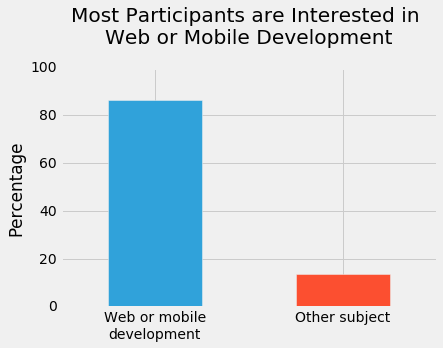

In [4]:
# Frequency table on web/mobile dev
web_or_mobile = interests_no_nulls.str.contains(  # use the no nulls to avoid funky information
    'Web Developer|Mobile Developer')  # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

# matplotlib global import
import matplotlib.pyplot as plt
%matplotlib inline

# continue using our style from last project
plt.style.use('fivethirtyeight')

# Graph for the frequency table above
freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08)  # y pads the title upward
plt.ylabel('Percentage')
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0)  # the initial xtick labels were True and False
plt.ylim([0,100])  # obviously hard-coded limits
plt.show()

It turns out 86% of respondents are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

Now we move on to our main research question and need to figure out what are the best markets to invest money in for advertising our courses. Again, We'd like to know (copied from before):

* Where are these new coders located
* What are the locations with the greatest number of new coders
* How much money new coders are willing to spend on learning

## Locations and Densities

Let's begin to look at the first bullet point now, about where these new coders are located. We observe that the 'CountryLive' column povides us information about where these coders live at the country level. Unfortunately, it doesn't go deeper than that, but just segmenting the markets by country can be good to.

To make sure we stick to our representative sample, we'll use the 'resulting' dataset from people who didn't have a null in their interests column, as this would skew results.

In [5]:
# Isolate the participants
fcc_loc = fcc[fcc['JobRoleInterest'].notnull()].copy()

# absolute and relative frequencies
absolute = fcc_loc['CountryLive'].value_counts()
relative = fcc_loc['CountryLive'].value_counts(normalize = True) * 100

# Display in a more readable format
pd.DataFrame(data = {'Absolute Frequency': absolute, 
                     'Percentage': relative}
            )

,Absolute Frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


It looks like the USA is the most dense of the group, accounting for almost half of responses. From the table itself, it looks like choosing the USA and India alone would be good markets, as those two advertisement locations would already account for over 50% of the total set. 

However, we probably need to go a little further. Not in terms of location, as we have already stated country is the deepest location goes, but in terms of willingness to spend. We already know that these participants are willing to learn just from their responses, but advertising in the USA when 99% of responders listed that they'd be willing to spend $0 on learning doesn't really make sense. The 'MoneyForLearning' column makes good use of this.

## Spending Money on Learning
Let's say our company sells subscriptions to courses at around $59 per month. We want to know if any of these new coders are even interested in that price point and if it is worth advertising for. 

We can use yet again a narrowed down version of the dataset, because we don't really care about responses in say, Liberia, for example, where there was only 1 response and Libera's official language isn't even English; even if this participant was willing to spend $59/month USD and spoke English, advertising to a whole country for few results is not the best practice. Density is king here. 

Narrowing down the dataset to just counties with over a 2% density results in the top 4 countries in the table provides volume, and is also good because these 4 countries are well-known to have English speakers too.

To start, we'll create a column that describes the amount of money a student has spent per month for speculation (a 0 value in the 'MonthsProgramming' column indicates a complete beginner, and we replace this with an innocent 1 to avoid dividing by 0).

In [6]:
# Replace 0s with 1s
fcc_loc['MonthsProgramming'].replace(0,1, inplace = True)

# New column for spending per month
fcc_loc['money_per_month'] = fcc_loc['MoneyForLearning'] / fcc_loc['MonthsProgramming']
print("before: ") 
print(fcc_loc['money_per_month'].isnull().sum())

# Keep only the rows with non-nulls
fcc_loc = fcc_loc[fcc_loc['money_per_month'].notnull()]
print("after: ")
print(fcc_loc['money_per_month'].isnull().sum())

before: 
675
after: 
0


We want to group the data by country, and then measure the average amount of money that students spend per month in each country. First, let's remove the rows having null values for the CountryLive column, and check out if we still have enough data for the four countries that interest us.

In [7]:
# Remove the rows with null values
fcc_loc = fcc_loc[fcc_loc['CountryLive'].notnull()]

# check if we still have enough data
fcc_loc['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

Looks good and plentiful from here! Time to compute the average using pandas' handy groupby:

In [8]:
# money spent by students each month
countries_mean = fcc_loc.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

We see that it is good that numbers are relatively high, but we also see that the UK looks a little off. Going by very basic metrics such as GDP, we would expect countries like the UK and Canada to be willing to spend more than India, yet India ranks 2nd and the UK is significantly last.

Perhaps this is due to some outliers? After all, a few hundred responses is not going to represent an entire country well 100% of the time. We can explore this further with some graphs.

## Looking for Outliers
A box plot for the money_per_month column can be used to easily see distributions and outliers:

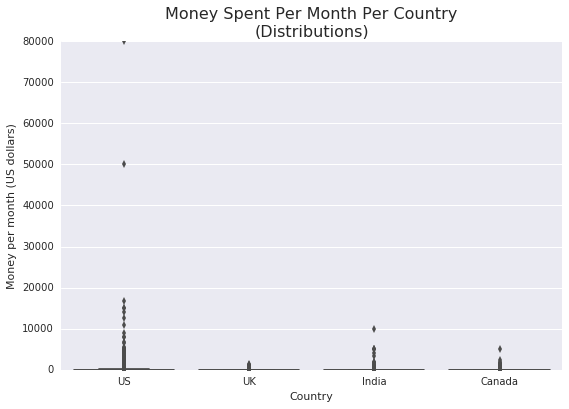

In [9]:
# remove a "warning" that would occur in seaborn generating this graph
# this issue was fixed in August 2017. It was triggered by Seaborn calling a private function in Pandas.
# versions running before August 2017 will still trigger the warning and can be stopped by the import below
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Isolate the countries of interest
only_4 = fcc_loc[fcc_loc['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Box plots 
import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)  # title too big otherwise
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])  # avoids tick labels overlap
plt.show()

It looks like two people in the US are spending over 50000 per month on learning...which...while not impossible, seems to be a good outlier. These data points are also scrunching up the rest of the data points, making the 0-20000 range incredibly small. We can remove them.

In [10]:
# Isolate only those participants who spend less than 20000 per month
fcc_loc = fcc_loc[fcc_loc['money_per_month'] < 20000]

# recompute analysis with this new set
countries_mean = fcc_loc.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

The US mean definately looks better and more plausible. Now for the graphs...

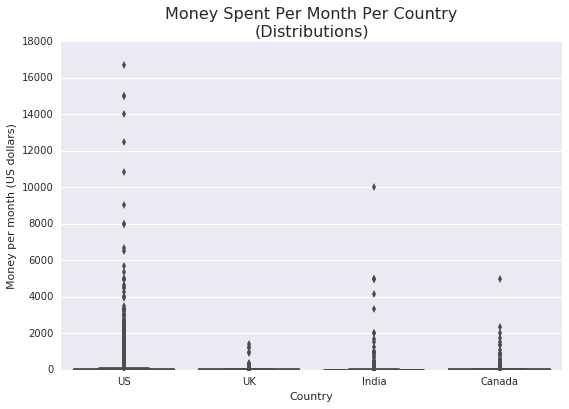

In [11]:
# copied from above
only_4 = fcc_loc[fcc_loc['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# copied from above
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)  # title too big otherwise
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])  # avoids tick labels overlap
plt.show()

We can now see a lot more potential outliers for the US, but it looks like there's enough such that we can conclude it's not random. There are 4 data points for India though that look kind of high, and we can examine these individually.

In [12]:
# outliers for India
india_outliers = only_4[
    (only_4['CountryLive'] == 'India') & 
    (only_4['money_per_month'] >= 5000)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,15 to 29 minutes,India,India,software development and IT,NaN,Employed for wages,NaN,500000.0,1.0,NaN,male,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,20.0,a6a5597bbbc2c282386d6675641b744a,da7bbb54a8b26a379707be56b6c51e65,300000.0,0.0,0.0,0.0,0.0,more than 12 months from now,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,work for a multinational corporation,1.0,"User Experience Designer, Back-End Web Devel...",in an office with other developers,Marathi,married or domestic partnership,5000.0,1.0,c47a447b5d,2017-03-26 14:06:48,2017-03-26 14:02:41,2017-03-26 14:13:13,2017-03-26 14:07:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not listened to anything yet.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Na

There is nothing apparent in these individual responses that would warrant their extreme willingness to pay to be truthful. None of these participants have attended a bootcamp that could cost big, and their employment status is questionable at best. It seems safer to drop these values.

In [13]:
# Remove the outliers
only_4 = only_4.drop(india_outliers.index) # using the row labels

While we're at it, we can look at the US outliers as well (and the 1 outlier for Canada). There's never really any real way of knowing for sure whether a response is truthful or not, but like in the case of India, there can be clues.

In [14]:
# outliers for the US
us_outliers = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

There looks to be 11 outliers, and 6 of them hav attended bootcamps, which generally cost in the thousand range, so more than half the responses are already accounted for. Just like with the India outliers, however, we can remove the other 5 just to be safe. 

We also can note that 8 of these participants note that they have less than three months experience. If any of these 8 paid for a bootcamp, it was most likely a one time thing and unrealistic to assume they will pay a large amount per month. We can also remove all 8 of these outliers, just in case they do not overlap with the previous 5. 

Doing these two things should remove the bulk of the outlier problem.

In [15]:
# Remove respondents who didn't attendent a bootcamp
no_bootcamp = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0)
]

only_4 = only_4.drop(no_bootcamp.index)

# Remove respondents programming for less than 3 months
less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]

only_4 = only_4.drop(less_than_3_months.index)

Finally, the one outlier in Canada: let's take a look.

In [16]:
# outlier for Canada
canada_outlier = only_4[
    (only_4['CountryLive'] == 'Canada') & 
    (only_4['money_per_month'] > 4500)]
canada_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This outlier seems to fall into place with the US programmers who have been coding for less than three months but have attended a boot camp. Probably a one time payment, and not smart to assume they will do it again. We can assume this and remove the outlier.

Note: People who have lots of experience coding and have attended bootcamps will have a lower money/month spent on average by calculation, and it is also safe to assume that veterans who attend bootcamps are more likely to do it again. Even if they don't, the driven down money/month value eliminates the extremity of the bootcamp cost, so this is why we don't investigate these values.

In [17]:
# Remove outlier Canada
only_4 = only_4.drop(canada_outlier.index)

Now let's put everything back together in our table:

In [18]:
# Recompute money spent each month
only_4.groupby('CountryLive').mean()['money_per_month']

CountryLive
Canada                       93.065400
India                        81.812102
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64

Much better values, and it shows promise that the graph will be better too:

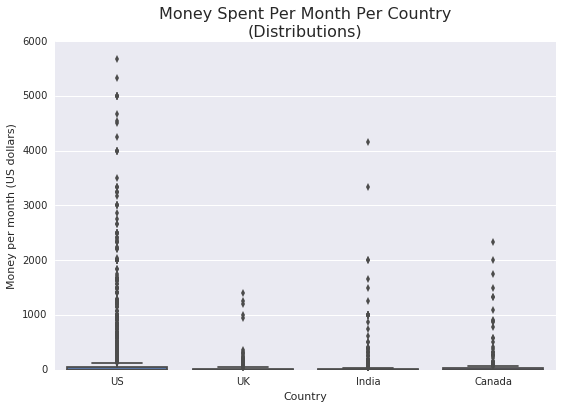

In [19]:
# Visualize the distributions again (copied)
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)  # title too big otherwise
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

While it is clear the majority of people definitely spend less than $200/month (75th percentile barely visibile) and the graph continues to reveal more potential "outliers", we can see that there are enough data points to show that some countries have people that really will spend this much, so we can include the data.

It's also interesting to note that UK as a whole is still really conservative in terms of its respondents' willingness to spend, which is surprising.

## So...What's the Best (Two) Market(s)?

Let's find the best two markets, because the first is very obviously the US and it's foolish to think otherwise. They have the volume (>3000 responses, 45% of total) and means (~$143/month on average spent) to support our subscriptions.

Going off our 59/month price point, Canada would seem to be the next best market given that they spend ~93/month on learning, but we can see that this isn't exactly the case. India, while behind at ~65/month, has almost twice as many responses as Canada, and thus twice as much volume to advertise to. This seems like a much better choice, especially if India's average spending rate is still higher than our price points.

While we cannot say for sure if India would be better than Canada, it seems more likely than not. A 30 percent hit rate in India would still be better than a 60 percent hit rate in Canada, given that each participant would be spending 59 per month FOR US regardless if their data point was at 20 or 2000 per month.

Also, we can be sure to rule the UK out, as it doesn't seem worth it to advertise here.

We can segment our analysis into some choices now: 
1. Advertise in the US, India, and Canada, focusing mostly on the US
2. Advertise in the US and India only, focusing mostly on the US
3. Advertise in the US only

At this point, it's a task of profit/loss margins, price predictions, etc. best suited for a marketing team. This is a good place to point out that often you will not be generating whole projects by yourself, especially working as a team as part of a company. The data experts have generated what they found, and now the three choices can be passed on to a marketing expert's domain knowledge for them to make the final decision.

The marketing team can now generate surveys of their own to decide between Canada or India, US only, etc. These surveys will be much less time consuming and much less expensive than if we just did a huge survey to begin with at the beginning of the analysis. The goal after all is to not only make the company money, but save money as well!

In [20]:
# Frequency table copied for quick viewing
only_4['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.929433
India                       11.778291
United Kingdom               7.159353
Canada                       6.132923
Name: CountryLive, dtype: float64

## Further Analysis / Next Steps
## Other Criteria?
In this project, we followed through with a specific set of questions as to where to find the best markets (location, money spent per month, etc.). This is not the only way to go about it, though. Although other strategies would probably yield similar results, it is very important to note that sometimes different conclusions can be reached by different criteria. For example, what if we grouped the graphs not by money sent per month, but by:
* events attended (could correlate to interest/willingness to learn and buy)
* resources used (EdX, youtube, etc. could also correlate)
* number of children (ok, extreme example, but even this could correlate to willingness to buy - less responsbility and more opportunity to spend on resources)

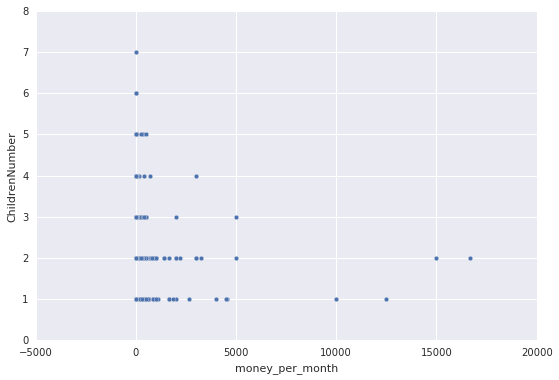

In [21]:
# example of money spent vs children
fcc_loc.plot.scatter(x = 'money_per_month', y = 'ChildrenNumber')

In [22]:
# example of average children by country
countries_children = fcc_loc.groupby('CountryLive').mean()
countries_children['ChildrenNumber'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    1.918367
India                       1.333333
United Kingdom              1.833333
Canada                      1.888889
Name: ChildrenNumber, dtype: float64

A very crude, almost funny-like graph displaying the last bullet point shows how the correlation would work. Although it's probably laughable to advertise by number of children each participant has, we can see the point being made: Less children generally results in more money per month being spent. 

This is an example of how other criteria would result in different markets. Markets do not have to be segmented by location, but could instead by segmented towards different age groups, income levels, etc. Here, the market would be people with 2 or fewer children, and it doesn't really make sense to segment by country since they are all similar.

Someone could make a whole project on this correlation and produce convincing results on advertising to a particular age group through social media, but we can probably see the flaw here. Correlation does not equal causation, and it is best to remember that when producing and reading results, our work or others.

## More Data
To continue this project, freeCodeCamp actually has a 2016 version of the survey too that we could combine onto the existing dataset here:
https://github.com/freeCodeCamp/2016-new-coder-survey

With a little bit of cleanup, all this requires is to combine the existing csvs into a new one and reperform the analysis almost as is, so we'll avoid the redundancy. We can also use other datasets from other companies that are not freeCodeCamp to avoid bias, which is important, but again this just involves cleanup and combining the resulting sets. We'll leave this as a more ambitious project to come back to!

## Stylistical Improvement: Code Comments

** Copied from previous project of Fandango Movies: same notes, same process, same results **

Commenting is important! In our previous projects, we just left the code as is, but it is important to note that sometimes our audience might not be as technical, or even if they are, might not understand a little bit of what we are trying to do in the code. Syntax is necessary, but semantics are a blessing.

*Comment as much as possible without stating the obvious or being redundant*

In addition to the code, the whole project itself must be communicated to the audience, so it is important to remember these major parts:
* Title
* Introduction
* Subheadings
* Conclusion
* Graphs
* Code

Making these individual parts clear will in turn make the project as a whole clear, and much more readible. The text itself should focus on these things:
* Readability
* The depth and clarity of your explanations
* The flow of the ideas you're writing about
* The connection between narrative and code

At the current rendition of this project, the code/text is not commented well. In future editions, these things could be improved on and better displayed to the viewer. 

NOTE: TODO - improve syntax - COMPLETED - as of this edition everything above this cell is commented and styled to meet 'guidelines'.

## Conclusion
In this project, we analyzed survey data from new coders to find the best (two) markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision, which is common practice and not a disapointing result at all.

We also did a few other things including practicing good styling for the code with proper comments, reveal what a faulty critera would look like in terms of process, and look at a few other criteria point of views that may or may not be promising. Overall, the use of basic statistical analysis pointed to an answer to our original question though, so it can be put 